In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pickle

def load_datasets(datasets_name="wine"):
    if datasets_name == "iris":
        dataset = datasets.load_iris()
    elif datasets_name == "wine":
        dataset = datasets.load_wine()

    X = dataset.data
    y = dataset.target

    y_ = y.reshape(-1, 1) # Convert data to a single column

    # One Hot encode the class labels
    encoder = OneHotEncoder(sparse=False)
    encoder.fit(y_)
    y = encoder.transform(y_)
    print(encoder.categories_)
    print(len(encoder.categories_[0]))

    # Split the data for training and testing
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    return x_train, x_test, y_train, y_test

def saveReport(accuracy_history, loss_history):
    data = {
        "accuracy_history": accuracy_history,
        "loss_history": loss_history,
    }
    pickle.dump(data, open("./BP_report.pkl", "wb"))

x_train, x_test, y_train, y_test = load_datasets()

[array([0, 1, 2])]
3


Neural Network Model Summary: 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 20)                280       
_________________________________________________________________
output (Dense)               (None, 3)                 63        
Total params: 343
Trainable params: 343
Non-trainable params: 0
_________________________________________________________________
None
X Train Shape (142, 13)
X Train Elemn [1.434e+01 1.680e+00 2.700e+00 2.500e+01 9.800e+01 2.800e+00 1.310e+00
 5.300e-01 2.700e+00 1.300e+01 5.700e-01 1.960e+00 6.600e+02]
Y Train Shape: (142, 3)
Y Train Elemn: [0. 0. 1.]
Input Shape: (None, 13)
Epoch 1/1000
29/29 - 1s - loss: 18.5539 - accuracy: 0.4085
Epoch 2/1000
29/29 - 0s - loss: 1.7898 - accuracy: 0.5986
Epoch 3/1000
29/29 - 0s - loss: 2.1123 - accuracy: 0.5211
Epoch 4/1000
29/29 - 0s - loss: 1.2690 - accuracy: 0.6408
Epoch 

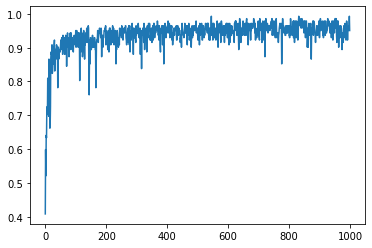

In [3]:
# Build the model

model = Sequential()

model.add(Dense(20, input_shape=(x_train[0].shape[0],), activation='relu', name='fc1'))
model.add(Dense(3, activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.01)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
print("X Train Shape",x_train.shape)
print("X Train Elemn",x_train[0])
print("Y Train Shape:",y_train.shape)
print("Y Train Elemn:",y_train[0])
print("Input Shape:", model.input.shape)
train_history = model.fit(x_train, y_train, verbose=2, batch_size=5, epochs=1000)

plt.plot(train_history.history["accuracy"])
plt.show(block=False)

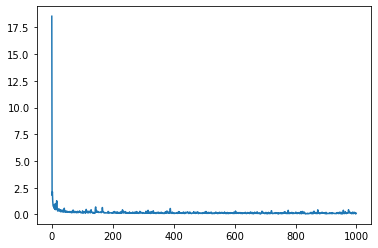

In [4]:
plt.plot(train_history.history["loss"])
plt.show(block=False)

In [5]:
# Test on unseen data

results = model.evaluate(x_test, y_test)

print("Evaluating Model Using test splits dataset")
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))


print("Model input:", model.input.shape)
print('Example Prediction from test split: ')
# for idx, x in enumerate(zip(x_test[:5], y_test[:5])):
#     plt.subplot("15{}".format(idx))
#     pred = model.predict(np.array([x[0]]))
#     pred = le.inverse_transform(pred)
#     truth = le.inverse_transform([x[1]])
#     plt.title("{}:{}".format(truth[0], pred[0]))
#     plt.imshow(np.array(x[0]).reshape((28,28,1)))
plt.show(block=False)

saveReport(train_history.history["accuracy"], train_history.history["loss"])

2/2 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 1.0000
Evaluating Model Using test splits dataset
Final test set loss: 0.022985
Final test set accuracy: 1.000000
Model input: (None, 13)
Example Prediction from test split: 
